In [42]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [4]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [5]:
y.head()

,class
0,0
1,0
2,7
3,4
4,6


In [24]:
model = NMF(n_components=64,max_iter=1000) # for ease of reconstrcutions taken 64

In [25]:
matrix_W = model.fit_transform(X)

In [26]:
matrix_W

array([[2.44095660e-02, 5.33542137e-02, 3.46496052e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.90267604e-01],
       [4.82984706e-03, 1.24364816e-01, 3.75017403e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.09237039e-02],
       [9.77379892e-02, 0.00000000e+00, 3.94000269e-02, ...,
        2.73194769e-02, 0.00000000e+00, 8.28865504e-02],
       ...,
       [4.27843747e-02, 9.92208207e-02, 1.69510690e-01, ...,
        2.57211037e-02, 2.22445284e-07, 1.25306006e-01],
       [1.45922313e-02, 0.00000000e+00, 3.17927461e-02, ...,
        1.63159972e-02, 7.53450078e-07, 0.00000000e+00],
       [9.68677776e-02, 1.35840614e-01, 1.07794082e-01, ...,
        7.36450113e-03, 1.69499573e-03, 4.40043311e-02]], shape=(5620, 64))

In [27]:
matrix_H = model.components_

In [28]:
matrix_H

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 192.4383085 ,   0.        , ...,   0.        ,
          2.88408242,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]], shape=(64, 64))

In [29]:
df_comp = pd.DataFrame(matrix_H,columns=X.columns)

In [30]:
df_comp.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0.0,0.0,0.000000,44.947118,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,42.332233,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.473053,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,15.464822,122.874034,0.0,0.0,0.0,0.0,0.0,0.283833,...,0.0,0.0,0.0,0.0,0.0,114.996603,188.376469,0.0,0.0,0.0


In [31]:
l = len(df_comp)
for i in range(0,l):
    k = df_comp.iloc[i].nlargest(10)
    print(k)
    print("\n")

Attribute4     44.947118
Attribute60    42.332233
Attribute29    25.049178
Attribute12     9.819966
Attribute13     0.972269
Attribute25     0.008121
Attribute1      0.000000
Attribute2      0.000000
Attribute3      0.000000
Attribute5      0.000000
Name: 0, dtype: float64


Attribute43    73.571921
Attribute35    68.780866
Attribute12     4.891821
Attribute27     4.751419
Attribute51     0.495684
Attribute1      0.000000
Attribute2      0.000000
Attribute3      0.000000
Attribute4      0.000000
Attribute5      0.000000
Name: 1, dtype: float64


Attribute52    72.321767
Attribute12     7.122334
Attribute60     0.473053
Attribute1      0.000000
Attribute2      0.000000
Attribute3      0.000000
Attribute4      0.000000
Attribute5      0.000000
Attribute6      0.000000
Attribute7      0.000000
Name: 2, dtype: float64


Attribute14    86.595946
Attribute38    48.343812
Attribute22    46.193417
Attribute30    42.780058
Attribute1      0.000000
Attribute2      0.000000
Attribute3      0.0000

In [32]:
# Reconstruction

In [33]:
print(len(X))

5620


In [34]:
v_matrix = np.dot(matrix_W,matrix_H)

In [40]:
v_matrix_resize = v_matrix.reshape(-1, 8, 8)  # shape: (5620, 8, 8)

In [ ]:
v_matrix_resize

class    0
Name: 0, dtype: int64


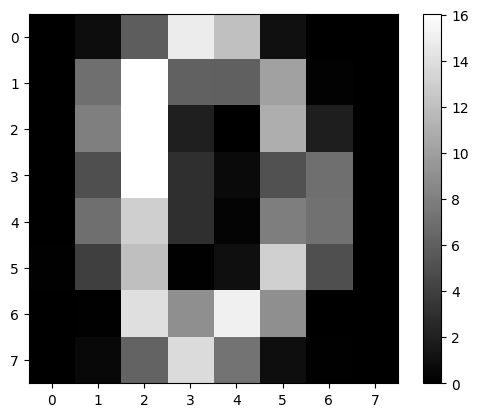

In [48]:
print(y.loc[0])
plt.imshow(v_matrix_resize[0],cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## Checking what NMF compoents are learning
Looking that how each compoents of NMF are built using parts by giving different wieghatges to all pixles

In [66]:
model = NMF(n_components=7,max_iter=1000)

In [67]:
w = model.fit_transform(X)

In [68]:
h = model.components_

In [69]:
def show_as_image(sample):
    bitmap = sample.reshape((8, 8)) # each entry as 64 values
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

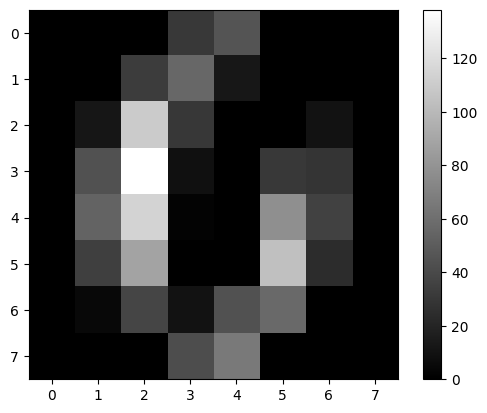

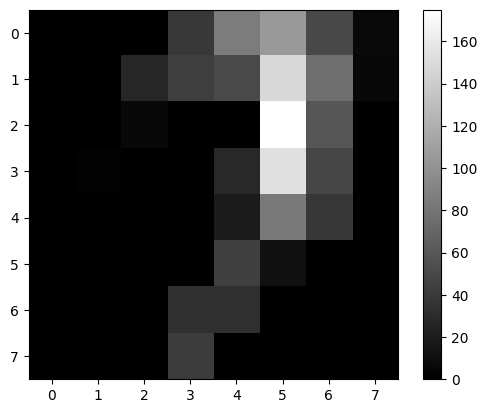

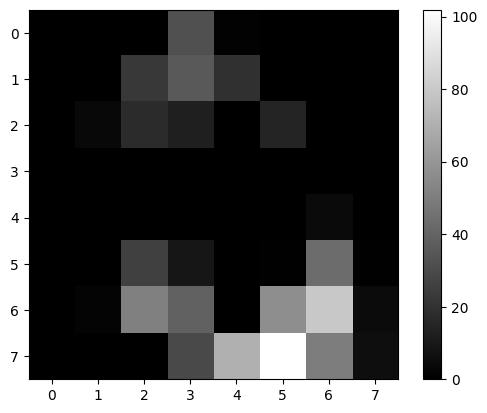

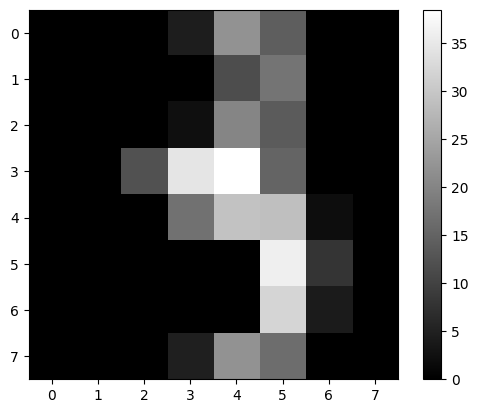

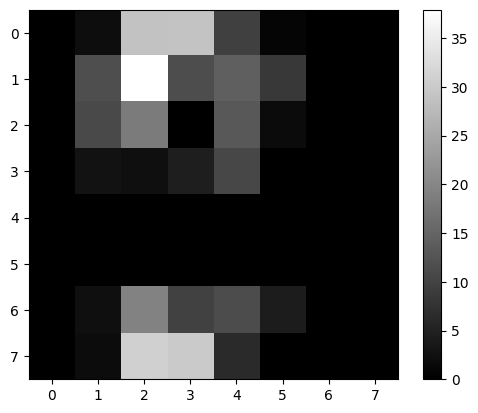

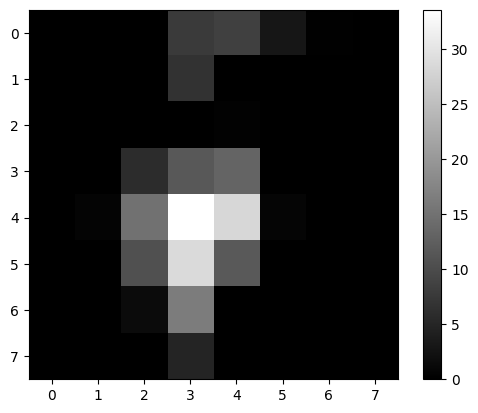

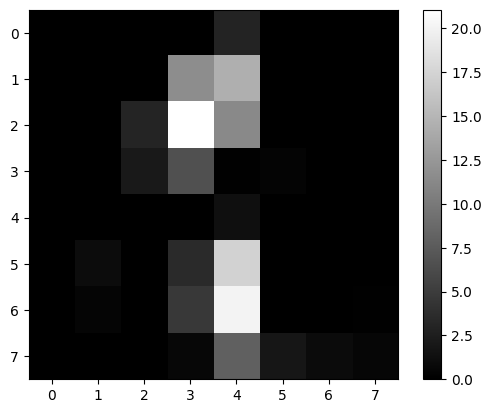

In [71]:
for i in h:
    show_as_image(i)
# 7 images : how each of 7 componets using different weihatge of 64 pixles